In [ ]:
#ANURADHA JAISWAL 
#BAHRAT INTERN 


In [ ]:
#necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
data=pd.read_csv("/content/ADANIPORTS.csv")
print(data)

            Date      Symbol Series  Prev Close    Open     High     Low  \
0     2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.00   
1     2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.00   
2     2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.00   
3     2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.00   
4     2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.00   
...          ...         ...    ...         ...     ...      ...     ...   
3317  2021-04-26  ADANIPORTS     EQ      725.35  733.00   739.65  728.90   
3318  2021-04-27  ADANIPORTS     EQ      730.75  735.00   757.50  727.35   
3319  2021-04-28  ADANIPORTS     EQ      749.15  755.00   760.00  741.10   
3320  2021-04-29  ADANIPORTS     EQ      746.25  753.20   765.85  743.40   
3321  2021-04-30  ADANIPORTS     EQ      746.75  739.00   759.45  724.50   

       Last   Close    VWAP    Volume      Turnover    Trades  \
0     959.0  962.90  9

In [ ]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [ ]:
data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
3317,2021-04-26,ADANIPORTS,EQ,725.35,733.0,739.65,728.90,729.2,730.75,733.25,9390549,6.885658e+14,116457.0,838079,0.0892
3318,2021-04-27,ADANIPORTS,EQ,730.75,735.0,757.50,727.35,748.6,749.15,747.67,20573107,1.538191e+15,236896.0,1779639,0.0865
3319,2021-04-28,ADANIPORTS,EQ,749.15,755.0,760.00,741.10,743.4,746.25,751.02,11156977,8.379106e+14,130847.0,1342353,0.1203
3320,2021-04-29,ADANIPORTS,EQ,746.25,753.2,765.85,743.40,746.4,746.75,753.06,13851910,1.043139e+15,153293.0,1304895,0.0942
3321,2021-04-30,ADANIPORTS,EQ,746.75,739.0,759.45,724.50,726.4,730.05,743.35,12600934,9.366911e+14,132141.0,3514692,0.2789


In [ ]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3.322000e+03,3.322000e+03,2.456000e+03,3.322000e+03,3322.000000
mean,344.114314,344.763019,351.608007,337.531969,344.239539,344.201626,344.853182,2.954564e+06,1.070144e+14,4.492259e+04,1.207441e+06,0.445899
std,192.936882,193.619992,198.617808,188.676614,193.187813,193.045886,193.841305,4.104227e+06,2.625564e+14,5.023124e+04,1.398640e+06,0.160496
min,108.000000,108.000000,110.450000,105.650000,108.000000,108.000000,108.340000,1.236600e+04,2.415857e+11,3.660000e+02,5.383000e+03,0.067000
25%,164.312500,164.850000,168.000000,161.600000,164.075000,164.312500,164.855000,7.493682e+05,1.817650e+13,2.083200e+04,3.212005e+05,0.332900
50%,324.700000,325.750000,331.275000,319.850000,325.000000,324.700000,325.765000,2.007292e+06,5.836041e+13,3.588150e+04,8.132775e+05,0.445650
75%,400.912500,401.000000,407.187500,395.000000,400.912500,400.912500,400.607500,3.636883e+06,1.158526e+14,5.336875e+04,1.605528e+06,0.555850
max,1307.450000,1310.250000,1324.000000,1270.000000,1308.000000,1307.450000,1302.150000,9.771788e+07,8.160988e+15,1.205984e+06,2.241652e+07,0.979800


In [ ]:
data.info

<bound method DataFrame.info of             Date      Symbol Series  Prev Close    Open     High     Low  \
0     2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.00   
1     2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.00   
2     2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.00   
3     2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.00   
4     2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.00   
...          ...         ...    ...         ...     ...      ...     ...   
3317  2021-04-26  ADANIPORTS     EQ      725.35  733.00   739.65  728.90   
3318  2021-04-27  ADANIPORTS     EQ      730.75  735.00   757.50  727.35   
3319  2021-04-28  ADANIPORTS     EQ      749.15  755.00   760.00  741.10   
3320  2021-04-29  ADANIPORTS     EQ      746.25  753.20   765.85  743.40   
3321  2021-04-30  ADANIPORTS     EQ      746.75  739.00   759.45  724.50   

       Last   Close    VWAP    Volume      Turnover    

In [ ]:
close_price = data['Close'].values.reshape(-1, 1)

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_price = scaler.fit_transform(close_price)


In [ ]:
# Split the data into training and testing sets
train_size = int(len(scaled_close_price) * 0.8)
train_data = scaled_close_price[:train_size]
test_data = scaled_close_price[train_size:]


In [ ]:
# Convert the data into sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
83/83 [==============================] - 6s 14ms/step - loss: 0.0056
Epoch 2/10
83/83 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 3/10
83/83 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 4/10
83/83 [==============================] - 1s 14ms/step - loss: 9.3715e-04
Epoch 5/10
83/83 [==============================] - 1s 15ms/step - loss: 8.6153e-04
Epoch 6/10
83/83 [==============================] - 1s 14ms/step - loss: 8.5907e-04
Epoch 7/10
83/83 [==============================] - 1s 14ms/step - loss: 7.0548e-04
Epoch 8/10
83/83 [==============================] - 1s 17ms/step - loss: 6.5248e-04
Epoch 9/10
83/83 [==============================] - 2s 24ms/step - loss: 6.1441e-04
Epoch 10/10
83/83 [==============================] - 1s 16ms/step - loss: 5.8105e-04


In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


21/21 [==============================] - 3s 6ms/step


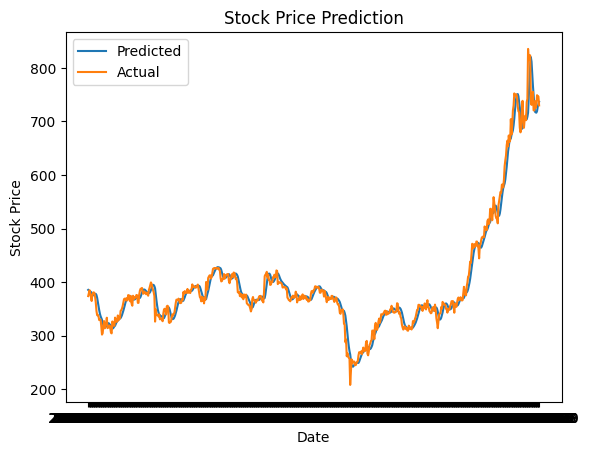

In [ ]:
# Visualize the predicted and actual prices
plt.plot(data['Date'][train_size+sequence_length:], predictions, label='Predicted')
plt.plot(data['Date'][train_size+sequence_length:], close_price[train_size+sequence_length:], label='Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

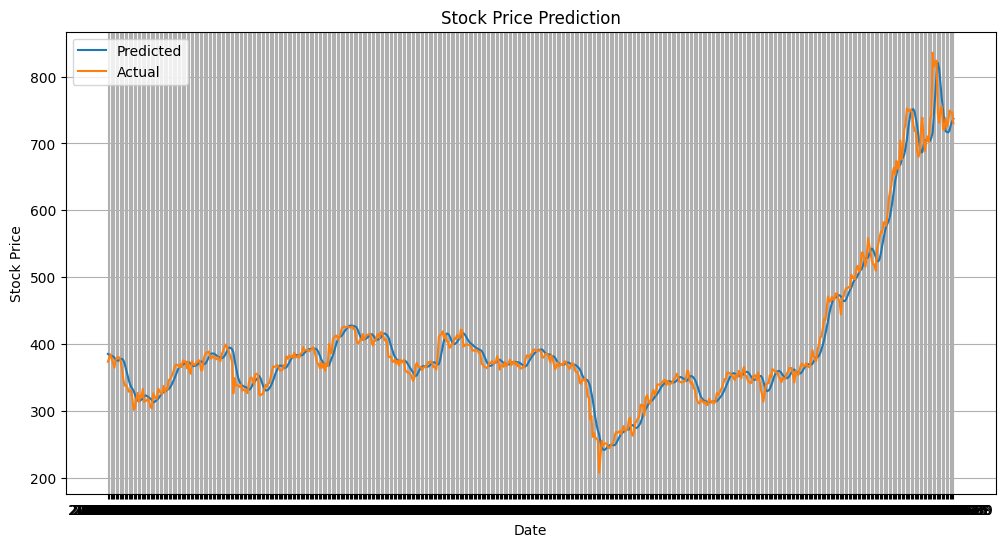

In [ ]:
# Visualize the predicted and actual prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][train_size+sequence_length:], predictions, label='Predicted')
plt.plot(data['Date'][train_size+sequence_length:], close_price[train_size+sequence_length:], label='Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

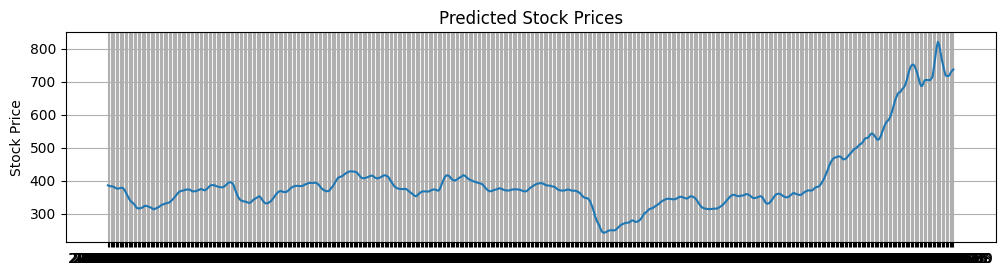

In [ ]:
# Plot the predicted and actual prices separately
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data['Date'][train_size+sequence_length:], predictions, label='Predicted')
plt.ylabel('Stock Price')
plt.title('Predicted Stock Prices')
plt.grid(True)


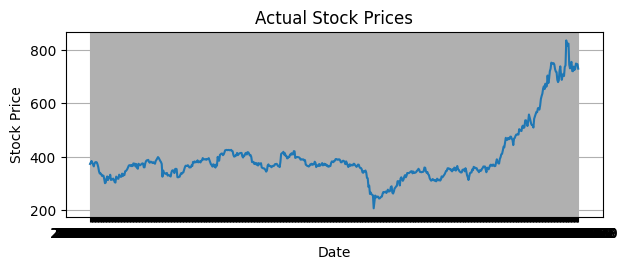

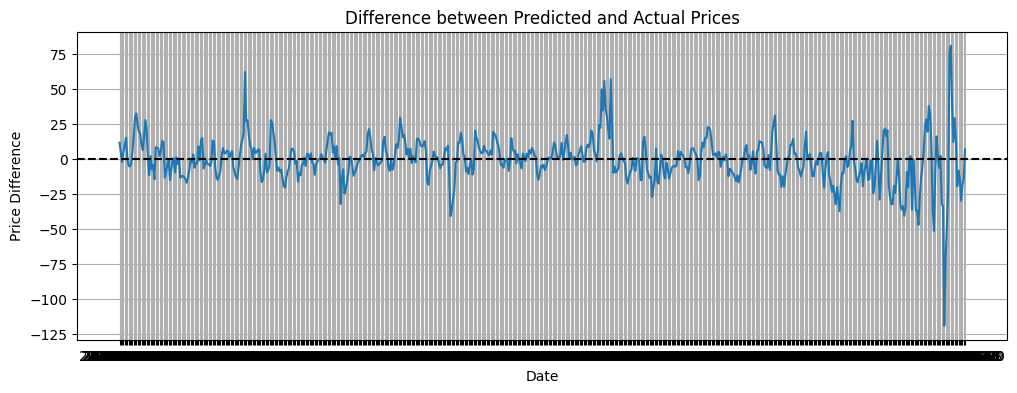

In [ ]:
plt.subplot(2, 1, 2)
plt.plot(data['Date'][train_size+sequence_length:], close_price[train_size+sequence_length:], label='Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Stock Prices')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot the difference between predicted and actual prices
difference = predictions - close_price[train_size+sequence_length:].reshape(-1, 1)

plt.figure(figsize=(12, 4))
plt.plot(data['Date'][train_size+sequence_length:], difference)
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.title('Difference between Predicted and Actual Prices')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--')
plt.show()








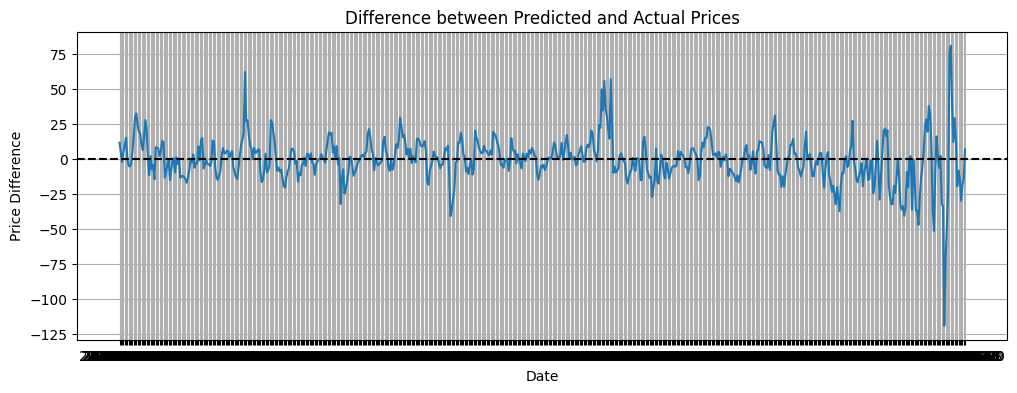

In [ ]:
# Plot the difference between predicted and actual prices
difference = predictions - close_price[train_size+sequence_length:].reshape(-1, 1)

plt.figure(figsize=(12, 4))
plt.plot(data['Date'][train_size+sequence_length:], difference)
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.title('Difference between Predicted and Actual Prices')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--')
plt.show()